# Neighbourhood Wars: School and Crime Cohabitation in Toronto   
#### Final Capstone Assignment Code: IBM Data Science Course

## Business Problem

Data that contributes to predicting the optimal location to establish a new private middle school may include neighbourhood crime rates in Toronto and coordinate information on the most popular venues in each of Toronto’s boroughs. This project aims to narrow down the numerous possible geographic locations in Toronto to open a new school based on the neighbourhood’s proximity to favourable venues.

## Data

* Safety levels of the nine Toronto boroughs were extracted from the Toronto Crime data set, and the safest three boroughs will be shortlisted https://data.torontopolice.on.ca/. 
* Toronto neighbourhood data was scraped from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:M:. 
* Toronto's postal codes from https://cocl.us/Geospatial_data. 
* The venue and location data will be fetched using the Foursquare API from https://foursquare.com
* Toronto student school commute data was taken from https://smartcommute.ca/wp-content/uploads/2016/02/School_Travel_Trends_GTHA_En.pdf


## Section 1: Analyzing the Toronto Crime Data

Extracting and analyzing Toronto crime incidents data between 2014 and 2019 from the Toronto Police Public Safety Data Portal.  

Toronto Crime Data: https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-/data?geometry=-80.305%2C43.542%2C-78.452%2C43.890&orderBy=TheftOver_CHG&selectedAttribute=Shape__Length

#### 1.1 Library Import

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd
!pip install folium
import folium

print('Folium installed and imported!')
!pip install opencage


from opencage.geocoder import OpenCageGeocode

%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Folium installed and imported!
Matplotlib version:  3.3.0
Libraries imported


#### 1.2 Downloading and Importing the Crime Data

In [2]:
crime_data = pd.read_csv('Neighbourhood_Crime_Rates_(Boundary_File)_.csv', header=0)
crime_data.head()

,Post,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,...,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,M5C,Yonge-St.Clair,97,12528,20,29,39,27,34,37,...,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582
1,M3J,York University Heights,27,27593,271,296,361,344,357,370,...,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326
2,M3A,Lansing-Westgate,38,16164,44,80,68,85,75,72,...,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625
3,M4A,Yorkdale-Glen Park,31,14804,106,136,174,161,175,209,...,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920
4,M8Y,Stonegate-Queensway,16,25051,88,71,76,95,87,82,...,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878


In [3]:
crime_data.rename(columns = {'Post':'Postal Code', 'Neighbourhood':'Neighborhood'}, inplace = True) 
crime_data.head()
crime_data.shape

(140, 60)

In [4]:
# Removig Unneccessary Columns
new_crime = crime_data.drop(['Neighborhood', 'Hood_ID', 'Shape__Area', 'Shape__Length', 'Population', 'Assault_2014', 'Assault_2015', 'Assault_2016', 'Assault_2017', 'Assault_2018', 'AutoTheft_2014', 'AutoTheft_2015', 'AutoTheft_2016', 'AutoTheft_2017', 'AutoTheft_2018', 'Assault_AVG', 'Assault_CHG', 'Assault_Rate_2019', 'AutoTheft_AVG', 'AutoTheft_CHG', 'AutoTheft_Rate_2019', 'BreakandEnter_2014', 'BreakandEnter_2015', 'BreakandEnter_2016', 'BreakandEnter_2017', 'BreakandEnter_2018', 'BreakandEnter_AVG', 'BreakandEnter_CHG', 'BreakandEnter_Rate_2019', 'Homicide_2014', 'Homicide_2015', 'Homicide_2016', 'Homicide_2017', 'Homicide_2018', 'Homicide_AVG', 'Homicide_CHG', 'Homicide_Rate_2019', 'Robbery_2014', 'Robbery_2015', 'Robbery_2016', 'Robbery_2017', 'Robbery_2018', 'Robbery_AVG', 'Robbery_CHG', 'Robbery_Rate_2019', 'TheftOver_2014', 'TheftOver_2015', 'TheftOver_2016', 'TheftOver_2017', 'TheftOver_2018', 'TheftOver_AVG', 'TheftOver_CHG', 'TheftOver_Rate_2019', 'Shape__Area', 'Shape__Length'], axis=1)


In [5]:
new_crime.head()

,Postal Code,Assault_2019,AutoTheft_2019,BreakandEnter_2019,Homicide_2019,Robbery_2019,TheftOver_2019
0,M5C,37,6,28,0,4,6
1,M3J,370,144,108,0,79,28
2,M3A,72,32,39,0,11,11
3,M4A,209,61,84,1,42,29
4,M8Y,82,34,64,0,22,4


#### 1.3 Importing and Merging Toronto Borough Data 

Scraping the Toronto Postal Codes page from Wikipedia https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [6]:
import requests # library to handle requests
import random # library for random number generation
import urllib.request
!pip install lxml    
!pip install beautifulsoup4
from pandas.io.json import json_normalize


from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

     |████████████████████████████████| 5.5MB 19.4MB/s eta 0:00:01
     |████████████████████████████████| 122kB 5.4MB/s eta 0:00:01


In [7]:
#  specifying which URL/web page to scrape
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")# parse HTML from URL into the BeautifulSoup parse tree format
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [8]:
A=[]
B=[]
C=[]
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')
## Looping through the rows to get the data
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

#### 1.4 Converting the Wikipedia Table into a Pandas Dataframe

In [9]:
dfn = pd.read_html(tab)
df=dfn[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### 1.5 Cleaning and Preprocessing the Data

In [10]:
dfA = df[df.Borough != 'Not assigned'] #Removing the 'Not Assigned'from the Borough column
dfA.head(11)

dfB = dfA.groupby(['Postal Code','Borough'], sort=False).agg(', '.join) #Joining the Neighbourhoods with the same Postal Code
dfB.reset_index(inplace=True)
dfB

dfB['Neighbourhood'] = np.where(dfB['Neighbourhood'] == 'Not assigned',dfB['Borough'], dfB['Neighbourhood'])
dfB # Replacing the 'Not Assigned' cell values with the same value in the respective Borough column value

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
dfB.shape #The shape method used to show the number of rows and columns
# renaming the column PostalCode to Postal Code
dfB.rename(columns = {'PostalCode':'Postal Code'}, inplace = True) 

In [12]:
dfB.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## Section 2: Exploring the City of Tornoto with Coordinates

The Latitude and Longitude values were retrieved for Toronto from 'https://cocl.us/Geospatial_data'.

In [13]:
coordinates = pd.read_csv('https://cocl.us/Geospatial_data')
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
## Merging the two tables coordinates and dfB- There is an overlap with the Postal Codes, however unique Latitude and Longitude columns
dfC = pd.merge(dfB,coordinates,on='Postal Code')
dfC.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [15]:
dfC.rename(columns = {'Neighbourhood':'Neighborhood'}, inplace = True) 

#### 2.1 Creating a New Dataset with Toronto's Crime, Borough and Coordinate Values

Merge the Toronto Boroughs, Neighborhoods and Coordinates with the new_crime Data.

In [16]:
## Cutting the boroughs and merging with the new crime data
complete_data = pd.merge(dfC, new_crime, on='Postal Code')
complete_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Assault_2019,AutoTheft_2019,BreakandEnter_2019,Homicide_2019,Robbery_2019,TheftOver_2019
0,M3A,North York,Parkwoods,43.753259,-79.329656,72,32,39,0,11,11
1,M3A,North York,Parkwoods,43.753259,-79.329656,158,32,68,1,36,5
2,M3A,North York,Parkwoods,43.753259,-79.329656,44,24,12,0,15,4
3,M4A,North York,Victoria Village,43.725882,-79.315572,209,61,84,1,42,29
4,M4A,North York,Victoria Village,43.725882,-79.315572,132,18,60,1,14,5


In [17]:
complete_data2 = complete_data.groupby(['Postal Code','Borough','Neighborhood','Latitude','Longitude'],as_index=False).agg({'Assault_2019': 'sum', 'AutoTheft_2019':'sum', 'BreakandEnter_2019':'sum', 'Homicide_2019':'sum', 'Robbery_2019':'sum', 'TheftOver_2019':'sum'})

In [18]:
complete_data2.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Assault_2019,AutoTheft_2019,BreakandEnter_2019,Homicide_2019,Robbery_2019,TheftOver_2019
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,563,177,132,1,79,26
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,58,27,33,1,9,1
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,642,56,105,4,98,9
3,M1G,Scarborough,Woburn,43.770992,-79.216917,427,60,100,0,67,8
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,266,55,52,1,40,9


#### 2.2 Creating a Total Crime Column for the Postal Codes

Summing accross the columns to retrieve the total incidents named "Total". The count function highlights that there are 75 different postal codes with neighborhoods and boroughs grouped within. 

In [19]:
sum_column = complete_data2["Assault_2019"] +complete_data2["AutoTheft_2019"] +complete_data2["BreakandEnter_2019"]+complete_data2["Homicide_2019"]+complete_data2["Robbery_2019"]+complete_data2["TheftOver_2019"]
complete_data2["Total"] = sum_column
complete_data2.head(3)

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Assault_2019,AutoTheft_2019,BreakandEnter_2019,Homicide_2019,Robbery_2019,TheftOver_2019,Total
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,563,177,132,1,79,26,978
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,58,27,33,1,9,1,129
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,642,56,105,4,98,9,914


Description of the Complete dataset using the .describe() function.

In [20]:
complete_data2.describe()

,Latitude,Longitude,Assault_2019,AutoTheft_2019,BreakandEnter_2019,Homicide_2019,Robbery_2019,TheftOver_2019,Total
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,43.708514,-79.397861,261.973333,67.773333,107.733333,0.973333,43.373333,17.613333,499.440000
std,0.050149,0.104511,238.788834,69.378432,93.107658,1.218920,35.989403,19.997225,408.686103
min,43.602414,-79.594054,26.000000,6.000000,15.000000,0.000000,2.000000,1.000000,81.000000
25%,43.668486,-79.481638,116.000000,27.000000,51.500000,0.000000,18.000000,6.000000,230.000000
50%,43.706748,-79.400049,201.000000,50.000000,85.000000,1.000000,34.000000,13.000000,405.000000
75%,43.751665,-79.333881,342.500000,83.000000,125.500000,2.000000,56.000000,19.500000,652.000000
max,43.815252,-79.160497,1462.000000,497.000000,611.000000,5.000000,197.000000,131.000000,2591.000000


Lets analyze how many neighborhoods are in each borough

In [21]:
complete_data2.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      6
Downtown Toronto     9
East Toronto         2
East York            4
Etobicoke           12
North York          18
Scarborough         15
West Toronto         4
York                 5
Name: Neighborhood, dtype: int64

In [22]:
#Create a new dataframe to find the safest borough
borough_df = complete_data2.drop(['Postal Code', 'Neighborhood', 'Latitude', 'Longitude','Assault_2019', 'AutoTheft_2019','BreakandEnter_2019','Homicide_2019','Robbery_2019','TheftOver_2019'], axis=1)

In [23]:
complete_data2.head(2)
new_borough = complete_data2.drop(['Postal Code', 'Neighborhood', 'Latitude', 'Longitude','Assault_2019', 'AutoTheft_2019','BreakandEnter_2019','Homicide_2019','Robbery_2019','TheftOver_2019'], axis=1)

In [24]:
new_borough.head(2)

,Borough,Total
0,Scarborough,978
1,Scarborough,129


In [25]:
new_borough.set_index('Borough')

,Total
Borough,
Scarborough,978
Scarborough,129
Scarborough,914
Scarborough,662
Scarborough,423
...,...
York,712
Etobicoke,285
Etobicoke,391


The grouped dataset below shows the number of crime incidents per borough.

In [26]:
Grouped= new_borough.groupby(['Borough']).sum()
Grouped

,Total
Borough,
Central Toronto,2277
Downtown Toronto,7296
East Toronto,1597
East York,1158
Etobicoke,5579
North York,7103
Scarborough,7951
West Toronto,2473
York,2024


#### 2.3 Crimes Per Borough Bar Chart

Text(0, 0.5, 'Total Crimes')

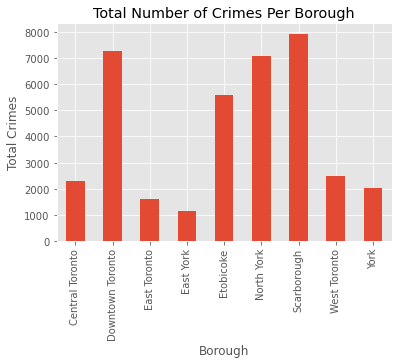

In [27]:
# Total Borough dataframe with an 'Borough' index
Grouped['Total'].plot(kind="bar", title="Number of Crimes Per Borough")
plt.title("Total Number of Crimes Per Borough")
plt.xlabel("Borough")
plt.ylabel("Total Crimes")

The above analysis shows that East York was the safest borough, whilst Scarborough is the most unsafe in Toronto 2019. The 3 boroughs I will choose from include East York, Central Toronto and York. The reason for excluding East Toronto is that it has the lowest nmber of neighborhoods, which will limit the locations available to set up a school.

#### 2.4 Creating a Map with all the Crime Data Neighborhoods in Toronto 

In [28]:
# Toronto latitude and longitude values
latitude = 43.651070
longitude = -79.347015

In [29]:
# Toronto map 
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)
toronto_map

In [30]:
complete_data2.head(2)

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Assault_2019,AutoTheft_2019,BreakandEnter_2019,Homicide_2019,Robbery_2019,TheftOver_2019,Total
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,563,177,132,1,79,26,978
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,58,27,33,1,9,1,129


In [31]:
#Renaming 'Postal Code' to 'PosatlCode' in order to add markers
complete_data2.rename(columns = {'Postal Code':'PostalCode'}, inplace = True) 
complete_data2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Assault_2019,AutoTheft_2019,BreakandEnter_2019,Homicide_2019,Robbery_2019,TheftOver_2019,Total
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,563,177,132,1,79,26,978
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,58,27,33,1,9,1,129
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,642,56,105,4,98,9,914
3,M1G,Scarborough,Woburn,43.770992,-79.216917,427,60,100,0,67,8,662
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,266,55,52,1,40,9,423


In [32]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the incidents
for lat, lng, in zip(complete_data2.Latitude, complete_data2.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )
# add pop-up text to each marker on the map
latitudes = list(complete_data2.Latitude)
longitudes = list(complete_data2.Longitude)
labels = list(complete_data2.PostalCode)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(toronto_map)    
    

    
# adding incidents to map
toronto_map.add_child(incidents)

## Section 3: Methodology

* A new datarame including only the East York, York and Central Toronto boroughs and its neighborhood and coordinate data.
* A Folium map with the three boroughs and neighborhoods superimposed onto it.
*  The next task will be to create a dataset with the boroughs most common venues within the neighborhoods. In order to retrieve the relevant data, the FourSquare API will be used to identify the neighborhood venues. Machine learning techniques will be utilized to cluster the neighborhoods and superimpose these findings onto a folium map.

In [33]:
dfC.head(3)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636


#### 3.1 Creating a Dataframe with East York, York and Central Toronto.

In [34]:
safe_3=dfC

In [35]:
safe_3=safe_3[(safe_3.Borough=='York') |
            (safe_3.Borough=='East York') |
            (safe_3.Borough=='Central Toronto')]
safe_3.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
14,M4C,East York,Woodbine Heights,43.695344,-79.318389
16,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
21,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
23,M4G,East York,Leaside,43.709060,-79.363452


#### 3.2 Map of of the 3 Selected Boroughs and Neighborhoods in Toronto

In [36]:
#List of the 3 boroughs
list_3 = safe_3['Borough'].unique().tolist()

In [37]:
#Categorizing the colours for the 3 boroughs
borough_color = {}
for borough in list_3:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random colour

In [38]:
bor_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(safe_3['Latitude'], 
                                           safe_3['Longitude'],
                                           safe_3['Borough'], 
                                           safe_3['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.8).add_to(bor_map)  
    
bor_map

#### 3.3 Using Foursquare API to Determine the Venues in the 3 Boroughs

Defining Foursquare API crdentials.

In [39]:
CLIENT_ID = 'TVUZFSV3D2NTX3UH0R4UN4XPDMENTVP5YEN4CGZX2HPDNTYA' 
CLIENT_SECRET = 'S5FOUI00UB2BYLV20PD32X4QZI4NEBCLCEQBQDH2YMKPA5UR'
VERSION = 20200514 # Foursquare API version

print('Stored Credentials')

Stored Credentials


Top 100 venues that are in Parkview Hill within a radius of 500 meters

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now to retrieve all the venues within the 3 boroughs and neighborhoods.

In [41]:
nei_venues = getNearbyVenues(names=safe_3['Neighborhood'],
                                latitudes=safe_3['Latitude'],
                                longitudes=safe_3['Longitude'])

Parkview Hill, Woodbine Gardens
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Lawrence Park
Roselawn
Runnymede, The Junction North
Weston
Davisville North
Forest Hill North & West, Forest Hill Road Park
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park


In [42]:
nei_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Jawny Bakers,43.705783,-79.312913,Gastropub
1,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
2,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Shoppers Drug Mart,43.705933,-79.312825,Pharmacy
3,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,TD Canada Trust,43.705740,-79.312270,Bank
4,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Pizza Pizza,43.705159,-79.313130,Pizza Place


Finding the number of venues per neighborhood

In [43]:
nei_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Caledonia-Fairbanks,4,4,4,4,4,4
Davisville,38,38,38,38,38,38
Davisville North,8,8,8,8,8,8
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",6,6,6,6,6,6
"East Toronto, Broadview North (Old East York)",5,5,5,5,5,5
"Forest Hill North & West, Forest Hill Road Park",4,4,4,4,4,4
Humewood-Cedarvale,3,3,3,3,3,3
Lawrence Park,4,4,4,4,4,4
Leaside,32,32,32,32,32,32


The number of unqiue venues for all the neighborhoods

In [44]:
print('There are {} uniques categories.'.format(len(nei_venues['Venue Category'].unique())))

There are 87 uniques categories.


In [45]:
print("The Venue Categories are", nei_venues['Venue Category'].unique())

The Venue Categories are ['Gastropub' 'Gym / Fitness Center' 'Pharmacy' 'Bank' 'Pizza Place'
 'Breakfast Spot' 'Café' 'Pet Store' 'Intersection' 'Athletics & Sports'
 'Skating Rink' 'Curling Ice' 'Beer Store' 'Park' 'Bus Stop' 'Field'
 'Trail' 'Hockey Arena' "Women's Store" 'Pool' 'Sports Bar'
 'Sporting Goods Shop' 'Liquor Store' 'Fish & Chips Shop' 'Bike Shop'
 'Restaurant' 'Coffee Shop' 'Grocery Store' 'Supermarket' 'Smoothie Shop'
 'Sushi Restaurant' 'Department Store' 'Burger Joint' 'Shopping Mall'
 'Sandwich Place' 'Dessert Shop' 'Brewery' 'Furniture / Home Store'
 'Electronics Store' 'Mexican Restaurant' 'Bagel Shop' 'Warehouse Store'
 'Indian Restaurant' 'Gym' 'Yoga Studio' 'Gas Station'
 'Fast Food Restaurant' 'Middle Eastern Restaurant' 'Discount Store'
 'Convenience Store' 'Bar' 'Swim School' 'Bus Line' 'Garden'
 'Home Service' 'Food & Drink Shop' 'Hotel' 'Jewelry Store'
 'Salon / Barbershop' 'Chinese Restaurant' 'Spa' 'Diner' 'Clothing Store'
 'Cosmetics Shop' 'Vegetarian /

Discovering the types of public transport categories within the 3 boroughs.

In [46]:
"Light Rail Station" in nei_venues['Venue Category'].unique()

True

In [47]:
"Bus Line" in nei_venues['Venue Category'].unique()

True

In [48]:
"Bus Stop" in nei_venues['Venue Category'].unique()

True

In [49]:
"Bus Stop" in nei_venues['Venue Category'].unique()

True

#### 3.4 Now to Use One Hot Encoding to Aanlyze Each Neighborhood

In [50]:
# one hot encoding
bor_onehot = pd.get_dummies(nei_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bor_onehot['Neighborhood'] = nei_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bor_onehot.columns[-1]] + list(bor_onehot.columns[:-1])
bor_onehot = bor_onehot[fixed_columns]

print(bor_onehot.shape)
bor_onehot.head(5)

(205, 88)


,Neighborhood,American Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bank,Bar,Beer Store,Bike Shop,Breakfast Spot,...,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Women's Store,Yoga Studio
0,"Parkview Hill, Woodbine Gardens",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Parkview Hill, Woodbine Gardens",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Parkview Hill, Woodbine Gardens",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Parkview Hill, Woodbine Gardens",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Parkview Hill, Woodbine Gardens",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
bor_onehot.rename(columns = {'Neighborhoods':'Neighborhood'}, inplace = True) 


The Neighborhoods will be grouped. From here the mean frequency of category occurence will be dispalyed.

In [52]:
nei_grouped = bor_onehot.groupby(["Neighborhood"]).mean().reset_index()
nei_grouped.head()

,Neighborhood,American Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bank,Bar,Beer Store,Bike Shop,Breakfast Spot,...,Swim School,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Women's Store,Yoga Studio
0,Caledonia-Fairbanks,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.25,0.0
1,Davisville,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,...,0.0,0.026316,0.026316,0.052632,0.0,0.0,0.0,0.0,0.00,0.0
2,Davisville North,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0
4,"East Toronto, Broadview North (Old East York)",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0


Top 8 venues for each neighborhood

In [53]:
top_venues = 8
for hood in nei_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nei_grouped[nei_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Caledonia-Fairbanks----
                 venue  freq
0                 Park  0.50
1        Women's Store  0.25
2                 Pool  0.25
3  American Restaurant  0.00
4         Liquor Store  0.00
5                  Pub  0.00
6          Pizza Place  0.00
7             Pharmacy  0.00


----Davisville----
                venue  freq
0         Pizza Place  0.08
1      Sandwich Place  0.08
2        Dessert Shop  0.08
3         Coffee Shop  0.05
4  Italian Restaurant  0.05
5                 Gym  0.05
6    Toy / Game Store  0.05
7                Café  0.05


----Davisville North----
               venue  freq
0              Hotel  0.25
1   Department Store  0.12
2  Food & Drink Shop  0.12
3        Pizza Place  0.12
4     Breakfast Spot  0.12
5               Park  0.12
6     Sandwich Place  0.12
7         Restaurant  0.00


----Del Ray, Mount Dennis, Keelsdale and Silverthorn----
                venue  freq
0      Discount Store  0.17
1          Restaurant  0.17
2                 Bar  0.

Let us view the top 10 venues in each neighborhood

In [54]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [55]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_10 = pd.DataFrame(columns=columns)
venues_10['Neighborhood'] = nei_grouped['Neighborhood']

for ind in np.arange(nei_grouped.shape[0]):
    venues_10.iloc[ind, 1:] = return_most_common_venues(nei_grouped.iloc[ind, :], top_venues)

venues_10.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Park,Pool,Women's Store,Field,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Farmers Market
1,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Italian Restaurant,Coffee Shop,Toy / Game Store,Gym,Café,Sushi Restaurant,Restaurant
2,Davisville North,Hotel,Pizza Place,Sandwich Place,Park,Food & Drink Shop,Breakfast Spot,Department Store,Farmers Market,Dessert Shop,Diner
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",Restaurant,Sandwich Place,Convenience Store,Bar,Coffee Shop,Discount Store,Fast Food Restaurant,Dessert Shop,Diner,Donut Shop
4,"East Toronto, Broadview North (Old East York)",Intersection,Pizza Place,Convenience Store,Park,Yoga Studio,Field,Diner,Discount Store,Donut Shop,Electronics Store


Creating a new dataframe with mean number of bus lines, coffee shops, light rail stations, parks, swim schools, and convenience stores within the neighborhoods.

In [56]:
transport = nei_grouped[["Neighborhood","Bus Line", "Coffee Shop", "Light Rail Station", "Park", "Swim School", "Convenience Store"]]
transport.head() 

,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store
0,Caledonia-Fairbanks,0.0,0.000000,0.0,0.500000,0.0,0.000000
1,Davisville,0.0,0.052632,0.0,0.026316,0.0,0.000000
2,Davisville North,0.0,0.000000,0.0,0.125000,0.0,0.000000
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.0,0.166667,0.0,0.000000,0.0,0.166667
4,"East Toronto, Broadview North (Old East York)",0.0,0.000000,0.0,0.200000,0.0,0.200000


#### 3.5 Determining the Optimal Number of K Clusters

Importing the required libraries

In [57]:
from sklearn.cluster import KMeans
import seaborn as sns
#Initialize KMeans with these parameters, where the output parameter is called k_means.
k_means = KMeans(n_clusters=5, init='k-means++', max_iter=15, random_state=8)
X = transport.drop(['Neighborhood'], axis=1)

In [58]:
k_means.fit(X)
k_means.labels_[0:10]

array([2, 0, 4, 0, 4, 4, 0, 2, 0, 4], dtype=int32)

In [59]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [60]:
results = [get_inertia(x) for x in range(2, 19)]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return_n_iter=True)


Text(0, 0.5, 'Error')

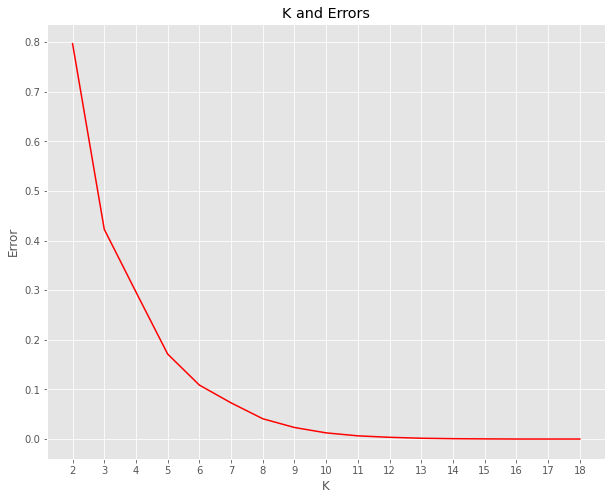

In [61]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 19), y=results, color='r')
plt.title("K and Errors")
plt.xticks(range(2, 19))
plt.xlabel("K")
plt.ylabel("Error")

     |████████████████████████████████| 266kB 5.9MB/s eta 0:00:01


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return_n_iter=True)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


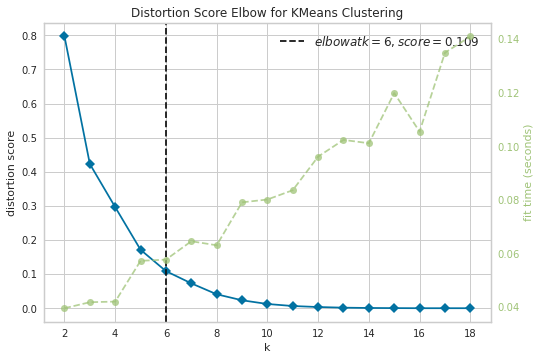

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
! pip install -U yellowbrick
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,19))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

#### 3.6 Clustering the Neighborhoods

We will be using 6 clusters.

In [63]:
kclusters = 6

cluster_grouped = transport.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 5, 0, 5, 5, 0, 2, 0, 5], dtype=int32)

In [64]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
merged_3 = transport.copy()

# add clustering labels
merged_3["Cluster Labels"] = kmeans.labels_

In [65]:
merged_3.head()

,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels
0,Caledonia-Fairbanks,0.0,0.000000,0.0,0.500000,0.0,0.000000,4
1,Davisville,0.0,0.052632,0.0,0.026316,0.0,0.000000,0
2,Davisville North,0.0,0.000000,0.0,0.125000,0.0,0.000000,5
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.0,0.166667,0.0,0.000000,0.0,0.166667,0
4,"East Toronto, Broadview North (Old East York)",0.0,0.000000,0.0,0.200000,0.0,0.200000,5


In [66]:
merged_3 =merged_3.join(nei_venues.set_index("Neighborhood"), on="Neighborhood")
print(merged_3.shape)

(205, 14)


In [67]:
merged_3.head()

,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Caledonia-Fairbanks,0.0,0.000000,0.0,0.500000,0.0,0.0,4,43.689026,-79.453512,Nairn Park,43.690654,-79.456300,Park
0,Caledonia-Fairbanks,0.0,0.000000,0.0,0.500000,0.0,0.0,4,43.689026,-79.453512,Maximum Woman,43.690651,-79.456333,Women's Store
0,Caledonia-Fairbanks,0.0,0.000000,0.0,0.500000,0.0,0.0,4,43.689026,-79.453512,Fairbanks Pool,43.691959,-79.448922,Pool
0,Caledonia-Fairbanks,0.0,0.000000,0.0,0.500000,0.0,0.0,4,43.689026,-79.453512,Fairbank Memorial Park,43.692028,-79.448924,Park
1,Davisville,0.0,0.052632,0.0,0.026316,0.0,0.0,0,43.704324,-79.388790,Jules Cafe Patisserie,43.704138,-79.388413,Dessert Shop


Sorting the results by cluster labels.

In [68]:
merged_3.sort_values(["Cluster Labels"], inplace=True)
merged_3

,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,Leaside,0.0,0.093750,0.0,0.000000,0.0,0.0,0,43.709060,-79.363452,Mucho Burrito Fresh Mexican Grill,43.706746,-79.361707,Mexican Restaurant
10,"North Toronto West, Lawrence Park",0.0,0.117647,0.0,0.058824,0.0,0.0,0,43.715383,-79.405678,Civello Salon,43.715111,-79.400304,Salon / Barbershop
10,"North Toronto West, Lawrence Park",0.0,0.117647,0.0,0.058824,0.0,0.0,0,43.715383,-79.405678,Sushi Shop,43.713861,-79.400093,Restaurant
10,"North Toronto West, Lawrence Park",0.0,0.117647,0.0,0.058824,0.0,0.0,0,43.715383,-79.405678,C'est Bon,43.716785,-79.400406,Chinese Restaurant
10,"North Toronto West, Lawrence Park",0.0,0.117647,0.0,0.058824,0.0,0.0,0,43.715383,-79.405678,Nailsense,43.717467,-79.400653,Spa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Woodbine Heights,0.0,0.000000,0.0,0.166667,0.0,0.0,5,43.695344,-79.318389,TTC Stop #8913,43.696486,-79.317577,Bus Stop
9,"Moore Park, Summerhill East",0.0,0.000000,0.0,0.250000,0.0,0.0,5,43.689574,-79.383160,Loring-Wyle Parkette,43.690270,-79.383438,Park
9,"Moore Park, Summerhill East",0.0,0.000000,0.0,0.250000,0.0,0.0,5,43.689574,-79.383160,Camp Tournesol - Toronto Centre,43.686882,-79.383581,Summer Camp
9,"Moore Park, Summerhill East",0.0,0.000000,0.0,0.250000,0.0,0.0,5,43.689574,-79.383160,Reds,43.692816,-79.384504,Restaurant


In order to determine the optimal location, we must count the number of Coffee Shops, Bus Stops, Light Rail Stations and Bus Lines in East York, York and Central Toronto.

In [69]:
merged_3["Venue Category"].value_counts()["Bus Line"]

1

In [70]:
merged_3["Venue Category"].value_counts()["Coffee Shop"]

13

In [71]:
merged_3["Venue Category"].value_counts()["Light Rail Station"]

1

In [72]:
merged_3["Venue Category"].value_counts()["Swim School"]

1

In [73]:
merged_3["Venue Category"].value_counts()["Park"]

13

In [74]:
merged_3["Venue Category"].value_counts()["Convenience Store"]

4

We see that within the 3 boroughs there are 2 bus lines, a single bus stop and light rail station, and 12 coffee shops. Below is a graphical illusration of the number of the neighborhoods in each cluster.

In [75]:
# create map
clusters_map = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_3['Neighborhood Latitude'], merged_3['Neighborhood Longitude'], merged_3['Neighborhood'], merged_3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(clusters_map)
       
clusters_map

Determining the number of neighborhoods per cluster.

In [76]:
transport["Cluster Labels"] = kmeans.labels_
transport

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels
0,Caledonia-Fairbanks,0.00,0.000000,0.0000,0.500000,0.00,0.000000,4
1,Davisville,0.00,0.052632,0.0000,0.026316,0.00,0.000000,0
2,Davisville North,0.00,0.000000,0.0000,0.125000,0.00,0.000000,5
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.00,0.166667,0.0000,0.000000,0.00,0.166667,0
4,"East Toronto, Broadview North (Old East York)",0.00,0.000000,0.0000,0.200000,0.00,0.200000,5
5,"Forest Hill North & West, Forest Hill Road Park",0.00,0.000000,0.0000,0.250000,0.00,0.000000,5
6,Humewood-Cedarvale,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0
7,Lawrence Park,0.25,0.000000,0.0000,0.500000,0.25,0.000000,2
8,Leaside,0.00,0.093750,0.0000,0.000000,0.00,0.000000,0
9,"Moore Park, Summerhill East",0.00,0.000000,0.0000,0.250000,0.00,0.000000,5


In [77]:
transport.sort_values(by=['Cluster Labels'])

,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels
1,Davisville,0.00,0.052632,0.0000,0.026316,0.00,0.000000,0
16,Thorncliffe Park,0.00,0.050000,0.0000,0.050000,0.00,0.000000,0
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.00,0.166667,0.0000,0.000000,0.00,0.166667,0
15,"The Annex, North Midtown, Yorkville",0.00,0.090909,0.0000,0.045455,0.00,0.000000,0
14,"Summerhill West, Rathnelly, South Hill, Forest...",0.00,0.125000,0.0625,0.000000,0.00,0.000000,0
6,Humewood-Cedarvale,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0
8,Leaside,0.00,0.093750,0.0000,0.000000,0.00,0.000000,0
10,"North Toronto West, Lawrence Park",0.00,0.117647,0.0000,0.058824,0.00,0.000000,0
11,"Parkview Hill, Woodbine Gardens",0.00,0.000000,0.0000,0.000000,0.00,0.000000,0
12,Roselawn,0.00,0.000000,0.0000,0.000000,0.00,0.000000,0


The Number of Neighborhoods per Cluster.

In [78]:
#The number of neighborhoods per cluster
transport['Cluster Labels'].value_counts()

0    10
5     5
4     1
3     1
2     1
1     1
Name: Cluster Labels, dtype: int64

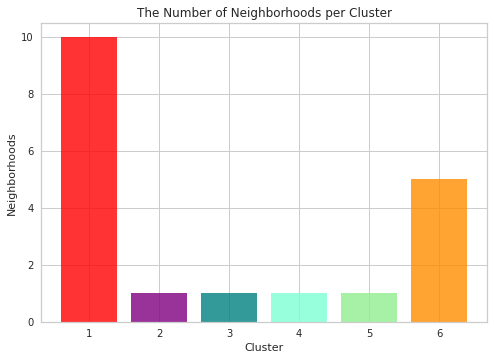

In [79]:
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
performance = transport['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple', 'teal','aquamarine','lightgreen', 'darkorange'])
plt.xticks(y_pos, objects)
plt.ylabel('Neighborhoods')
plt.xlabel('Cluster')
plt.title('The Number of Neighborhoods per Cluster')

plt.show()

### 3.6 Examining Each Cluster

The following code will analyze each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, the clusters will be named with a corresponding color.

#### 1st Cluster (Red)

Each cluster dataframe will merge with a dataframe containing boroughs and neighborhoods.

In [80]:
df_cluster=safe_3[['Borough', 'Neighborhood']]
df_cluster.head()

,Borough,Neighborhood
8,East York,"Parkview Hill, Woodbine Gardens"
14,East York,Woodbine Heights
16,York,Humewood-Cedarvale
21,York,Caledonia-Fairbanks
23,East York,Leaside


In [81]:
c1=merged_3.loc[merged_3['Cluster Labels'] == 0]
df_c1 = pd.merge(df_cluster, c1, on='Neighborhood')
df_c1.tail(16)

,Borough,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
151,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,Kiva's,43.687984,-79.394715,Bagel Shop
152,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,TTC Stop #,43.685826,-79.404981,Light Rail Station
153,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,Pizzaiolo,43.687991,-79.394634,Pizza Place
154,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,Sprout,43.687996,-79.394651,Vietnamese Restaurant
155,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,RBC Royal Bank,43.688058,-79.394478,Bank
156,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,LCBO,43.686991,-79.399238,Liquor Store
157,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,The Market By Longo’s,43.686711,-79.399536,Supermarket
158,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,Union Social Eatery,43.687895,-79.394916,American Restaurant
159,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,Mary Be Kitchen,43.687708,-79.395062,Restaurant
160,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",0.0,0.125,0.0625,0.0,0.0,0.0,0,43.686412,-79.400049,Starbucks,43.686756,-79.398292,Coffee Shop


#### 2nd Cluster (Purple)

In [82]:
c2=merged_3.loc[merged_3['Cluster Labels'] == 1]
df_c2 = pd.merge(df_cluster, c2, on='Neighborhood')
df_c2

,Borough,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,York,Weston,0.0,0.0,0.0,0.0,0.0,1.0,1,43.706876,-79.518188,Olympic convenience store,43.704486,-79.515789,Convenience Store


#### 3rd Cluster (Teal Blue)

In [83]:
c3=merged_3.loc[merged_3['Cluster Labels'] == 2]
df_c3 = pd.merge(df_cluster, c3, on='Neighborhood')
df_c3

,Borough,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Toronto,Lawrence Park,0.25,0.0,0.0,0.5,0.25,0.0,2,43.72802,-79.38879,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
1,Central Toronto,Lawrence Park,0.25,0.0,0.0,0.5,0.25,0.0,2,43.72802,-79.38879,Zodiac Swim School,43.728532,-79.382860,Swim School
2,Central Toronto,Lawrence Park,0.25,0.0,0.0,0.5,0.25,0.0,2,43.72802,-79.38879,cheltenham park,43.726670,-79.385324,Park
3,Central Toronto,Lawrence Park,0.25,0.0,0.0,0.5,0.25,0.0,2,43.72802,-79.38879,Lawrence Park Ravine,43.726963,-79.394382,Park


#### 4th Cluster (Aquamarine Blue)

In [84]:
c4=merged_3.loc[merged_3['Cluster Labels'] == 3]
df_c4 = pd.merge(df_cluster, c4, on='Neighborhood')
df_c4

,Borough,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,York,"Runnymede, The Junction North",0.0,0.0,0.0,0.0,0.0,0.5,3,43.673185,-79.487262,Wonderfood,43.672352,-79.492571,Convenience Store
1,York,"Runnymede, The Junction North",0.0,0.0,0.0,0.0,0.0,0.5,3,43.673185,-79.487262,High Park Brewery,43.669903,-79.483430,Brewery


#### 5th Cluster (Light Green)

In [85]:
c5=merged_3.loc[merged_3['Cluster Labels'] == 4]
df_c5 = pd.merge(df_cluster, c5, on='Neighborhood')
df_c5

,Borough,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,York,Caledonia-Fairbanks,0.0,0.0,0.0,0.5,0.0,0.0,4,43.689026,-79.453512,Nairn Park,43.690654,-79.456300,Park
1,York,Caledonia-Fairbanks,0.0,0.0,0.0,0.5,0.0,0.0,4,43.689026,-79.453512,Maximum Woman,43.690651,-79.456333,Women's Store
2,York,Caledonia-Fairbanks,0.0,0.0,0.0,0.5,0.0,0.0,4,43.689026,-79.453512,Fairbanks Pool,43.691959,-79.448922,Pool
3,York,Caledonia-Fairbanks,0.0,0.0,0.0,0.5,0.0,0.0,4,43.689026,-79.453512,Fairbank Memorial Park,43.692028,-79.448924,Park


#### 6th Cluster (Dark Orange)

In [86]:
c6=merged_3.loc[merged_3['Cluster Labels'] == 5]
df_c6 = pd.merge(df_cluster, c6, on='Neighborhood')
df_c6

,Borough,Neighborhood,Bus Line,Coffee Shop,Light Rail Station,Park,Swim School,Convenience Store,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East York,Woodbine Heights,0.0,0.0,0.0,0.166667,0.0,0.0,5,43.695344,-79.318389,Stan Wadlow Park,43.697836,-79.314303,Park
1,East York,Woodbine Heights,0.0,0.0,0.0,0.166667,0.0,0.0,5,43.695344,-79.318389,The Beer Store,43.693731,-79.316759,Beer Store
2,East York,Woodbine Heights,0.0,0.0,0.0,0.166667,0.0,0.0,5,43.695344,-79.318389,East York Curling Club,43.696827,-79.313658,Curling Ice
3,East York,Woodbine Heights,0.0,0.0,0.0,0.166667,0.0,0.0,5,43.695344,-79.318389,East York Memorial Arena,43.697224,-79.315397,Skating Rink
4,East York,Woodbine Heights,0.0,0.0,0.0,0.166667,0.0,0.0,5,43.695344,-79.318389,TTC Stop #8913,43.696486,-79.317577,Bus Stop
5,East York,Woodbine Heights,0.0,0.0,0.0,0.166667,0.0,0.0,5,43.695344,-79.318389,Shoppers Drug Mart,43.699232,-79.319319,Pharmacy
6,East York,"East Toronto, Broadview North (Old East York)",0.0,0.0,0.0,0.200000,0.0,0.2,5,43.685347,-79.338106,Danforth & Jones,43.684352,-79.334792,Intersection
7,East York,"East Toronto, Broadview North (Old East York)",0.0,0.0,0.0,0.200000,0.0,0.2,5,43.685347,-79.338106,The Path,43.683923,-79.335007,Park
8,East York,"East Toronto, Broadview North (Old East York)",0.0,0.0,0.0,0.200000,0.0,0.2,5,43.685347,-79.338106,Donlands & Mortimer,43.687680,-79.340100,Intersection
9,East York,"East Toronto, Broadview North (Old East York)",0.0,0.0,0.0,0.200000,0.0,0.2,5,43.685347,-79.338106,Sammon Convenience,43.686951,-79.335007,Convenience Store


#### 3.7 The Mean Number of Venues per Cluster

In [87]:
# The mean number of Coffee Shops per cluster
c1_mean_coffee=df_c1['Coffee Shop'].mean()
c2_mean_coffee=df_c2['Coffee Shop'].mean()
c3_mean_coffee=df_c3['Coffee Shop'].mean()
c4_mean_coffee=df_c4['Coffee Shop'].mean()
c5_mean_coffee=df_c5['Coffee Shop'].mean()
c6_mean_coffee=df_c6['Coffee Shop'].mean()
print(c1_mean_coffee)
print(c2_mean_coffee)
print(c3_mean_coffee)
print(c4_mean_coffee)
print(c5_mean_coffee)
print(c6_mean_coffee)

0.0778443113772455
0.0
0.0
0.0
0.0
0.0


In [88]:
# The mean number of Bus Lines per cluster
c1_mean_bus2=df_c1['Bus Line'].mean()
c2_mean_bus2=df_c2['Bus Line'].mean()
c3_mean_bus2=df_c3['Bus Line'].mean()
c4_mean_bus2=df_c4['Bus Line'].mean()
c5_mean_bus2=df_c5['Bus Line'].mean()
c6_mean_bus2=df_c6['Bus Line'].mean()
print(c1_mean_bus2)
print(c2_mean_bus2)
print(c3_mean_bus2)
print(c4_mean_bus2)
print(c5_mean_bus2)
print(c6_mean_bus2)

0.0
0.0
0.25
0.0
0.0
0.0


In [89]:
# The mean number of Light Rail Stations per cluster
c1_mean_rail=df_c1['Light Rail Station'].mean()
c2_mean_rail=df_c2['Light Rail Station'].mean()
c3_mean_rail=df_c3['Light Rail Station'].mean()
c4_mean_rail=df_c4['Light Rail Station'].mean()
c5_mean_rail=df_c5['Light Rail Station'].mean()
c6_mean_rail=df_c6['Light Rail Station'].mean()
print(c1_mean_rail)
print(c2_mean_rail)
print(c3_mean_rail)
print(c4_mean_rail)
print(c5_mean_rail)
print(c6_mean_rail)

0.005988023952095809
0.0
0.0
0.0
0.0
0.0


In [90]:
# The mean number of Park venues per cluster
c1_mean_par=df_c1['Park'].mean()
c2_mean_par=df_c2['Park'].mean()
c3_mean_par=df_c3['Park'].mean()
c4_mean_par=df_c4['Park'].mean()
c5_mean_par=df_c5['Park'].mean()
c6_mean_par=df_c6['Park'].mean()
print(c1_mean_par)
print(c2_mean_par)
print(c3_mean_par)
print(c4_mean_par)
print(c5_mean_par)
print(c6_mean_par)

0.02395209580838323
0.0
0.5
0.0
0.5
0.18518518518518517


In [91]:
# The mean number of Swim Schools per cluster
c1_mean_hoc=df_c1['Swim School'].mean()
c2_mean_hoc=df_c2['Swim School'].mean()
c3_mean_hoc=df_c3['Swim School'].mean()
c4_mean_hoc=df_c4['Swim School'].mean()
c5_mean_hoc=df_c5['Swim School'].mean()
c6_mean_hoc=df_c6['Swim School'].mean()
print(c1_mean_hoc)
print(c2_mean_hoc)
print(c3_mean_hoc)
print(c4_mean_hoc)
print(c5_mean_hoc)
print(c6_mean_hoc)

0.0
0.0
0.25
0.0
0.0
0.0


In [92]:
# The mean number of Convenience Stores per cluster
c1_mean_his=df_c1['Convenience Store'].mean()
c2_mean_his=df_c2['Convenience Store'].mean()
c3_mean_his=df_c3['Convenience Store'].mean()
c4_mean_his=df_c4['Convenience Store'].mean()
c5_mean_his=df_c5['Convenience Store'].mean()
c6_mean_his=df_c6['Convenience Store'].mean()
print(c1_mean_his)
print(c2_mean_his)
print(c3_mean_his)
print(c4_mean_his)
print(c5_mean_his)
print(c6_mean_his)

0.005988023952095809
1.0
0.0
0.5
0.0
0.037037037037037035


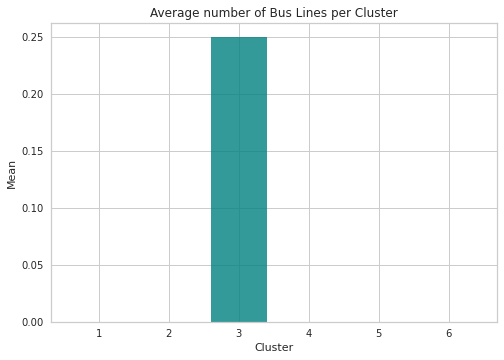

In [93]:
c_m = [df_c1['Bus Line'].mean(),df_c2['Bus Line'].mean(),df_c3['Bus Line'].mean(),
                 df_c4['Bus Line'].mean(), df_c5['Bus Line'].mean(),df_c6['Bus Line'].mean()]
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
perfo = c_m
plt.bar(y_pos, perfo, align='center', alpha=0.8, color=['red', 'purple','Teal','aquamarine', 'lightgreen', 'darkorange'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Bus Lines per Cluster')

plt.show()

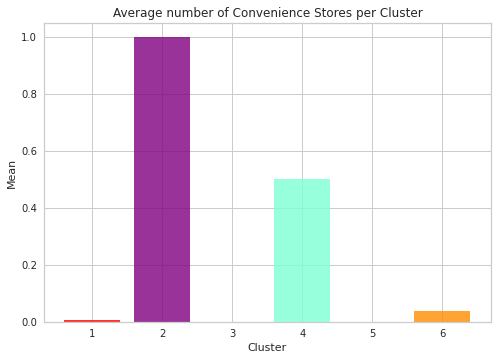

In [94]:
c_c = [df_c1['Convenience Store'].mean(),df_c2['Convenience Store'].mean(),df_c3['Convenience Store'].mean(),
                 df_c4['Convenience Store'].mean(), df_c5['Convenience Store'].mean(),df_c6['Convenience Store'].mean()]
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
perfo = c_c
plt.bar(y_pos, perfo, align='center', alpha=0.8, color=['red', 'purple','Teal','aquamarine', 'lightgreen', 'darkorange'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Convenience Stores per Cluster')

plt.show()

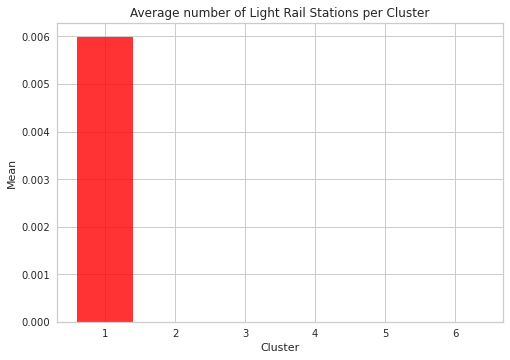

In [95]:
c_r = [df_c1['Light Rail Station'].mean(),df_c2['Light Rail Station'].mean(),df_c3['Light Rail Station'].mean(),
                 df_c4['Light Rail Station'].mean(), df_c5['Light Rail Station'].mean(),df_c6['Light Rail Station'].mean()]
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
perfo = c_r
plt.bar(y_pos, perfo, align='center', alpha=0.8, color=['red', 'purple','Teal','aquamarine', 'lightgreen', 'darkorange'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Light Rail Stations per Cluster')

plt.show()

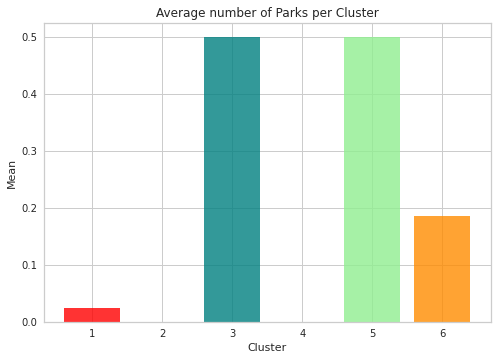

In [96]:
c_p = [df_c1['Park'].mean(),df_c2['Park'].mean(),df_c3['Park'].mean(),
                 df_c4['Park'].mean(), df_c5['Park'].mean(),df_c6['Park'].mean()]
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
perfo = c_p
plt.bar(y_pos, perfo, align='center', alpha=0.8, color=['red', 'purple','Teal','aquamarine', 'lightgreen', 'darkorange'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Parks per Cluster')

plt.show()

## Section 4: Results and Discussion

This study set out to identify the optimal location to position a private middle school in Toronto, Canada. Under the assumption, that safety is one of the key elements in creating a successful middle school, the boroughs were shortlisted into the safest three. This included East York, East Toronto, and York. However, when analysing the number of neighbourhoods within each borough, we saw that East Toronto only had two neighbourhoods. Therefore, the next best option would be to select York, as more neighbourhoods would cater for a larger catchment area of students. Furthermore, the low number of neighbourhoods in East Toronto may account for the low crime rate. 

With the safest boroughs shortlisted, the next location selection step would be determined by the transport, parks and recreational venue categories. Given the availability of public transport in Toronto, a new middle school must be conveniently located near these services. With this in mind, cluster one and five are appealing, as they would reduce the cost, time and safety of many parents otherwise bound to the strenuous school commute. The transport services available in the safest three boroughs are light rail trains (cluster one) and school buses (cluster five). As expected, the rail system is located in the more densely populated urban neighbourhoods of Summerhill West and Rathnelly, whilst the bus lines cater for the outer more residential neighbourhoods such as Lawrence park. Swim schools are conveniently located in cluster five with 0.33, which will aid in school extra mural sporting activities.

The majority of convenience stores are located in cluster two with a value of 1. Unfortunately, there is no convenience store locating in cluster five, and the stores in cluster one only makes up 0.05. 

For the parks and recreation category, coffee shops are solely located in the 1st cluster. This ties up well with the light rail system as it is a typical beverage consumed whilst on this mode of transport. Of the clusters available with parks, the fewest are located in cluster one with 0.02. Whereas cluster five and six are more park friendly with 0.33 and 0.5. According to Statista (2016), fewer than 24% of children consume caffeine from coffee. Whilst this venue may be convenient for parents waiting to pick up and drop off their children from school, it does not cater for half of the target audience, who are the school children. In addition, it may only satisfy a small portion of learners commuting by train and small groups socializing after class. Thus, it can be removed as an influential venue. 

Given all these factors it would be safe to say that Lawrence Park, cluster five (light green) would be the optimal location to establish a middle school. The availability of bus lines is vital in catering for a large percentage of the learner’s transport needs. The psychological and recreational benefits of parks would enhance the positive impact the school would have on the children. The convenience of the swimming school nearby would allow for extra-mural swimming activities from beginner to advanced swimmers between grades six and nine. Finally, zooming in on the cluster map, it is evident that there are numerous schools and colleges nearby which would allow for increased school sport rivalry, as well as social activities with the neighbouring schools.

A pitfall of the study is that it did not take into account the demographic representation of the families living in the safest three boroughs. For example, the average individual age of the three boroughs to determine the demand for grades six to nine was not studied. 


## Section 5: Conclusion

In this study I analysed key geographic locations and variables that would influence the positioning of a new private middle school in Toronto. I extracted Toronto crime data and short listed the three safest boroughs. Python libraries such as matplotlib, folium and KMeans were used to import, manipulate, merge and visualize data sets. Once the crime and neighbourhood data were merged, it allowed the Foursquare API to provide coordinates of the most common venues for the three safest boroughs. The venue categories included transport, parks and recreation, and convenience stores. 

Machine learning algorithms such as One Hot Encoding and K-Means clustering were used to identify the six clusters and the venue information in each. For reasons discussed earlier, cluster 5’s Lawrence Park was the chosen location. Investors heading the new school project can now make credible investment decisions given this analysis on neighbourhood safety and venues in Toronto. This study can be grown to include many more variables to enhance the credibility of the chosen location. Demographic indicators such as wage, is an example of an additional variable that can be included to gain a more thorough understanding of the target audience.  
